In [2]:
import pandas as pd
import numpy as np
import utility as util
import matplotlib.pyplot as plt

<b> Part I: Logistic Regression</b>

In [3]:
data = pd.read_csv('data_customer.csv')

In [4]:
data

,acctnum,gender,state,zip,zip3,first,last,book_,nonbook_,total_,purch,child,youth,cook,do_it,refernce,art,geog,buyer
0,10001,M,NY,10605,106,49,29,109,248,357,10,3,2,2,0,1,0,2,no
1,10002,M,NY,10960,109,39,27,35,103,138,3,0,1,0,1,0,0,1,no
2,10003,F,PA,19146,191,19,15,25,147,172,2,0,0,2,0,0,0,0,no
3,10004,F,NJ,7016,70,7,7,15,257,272,1,0,0,0,0,1,0,0,no
4,10005,F,NY,10804,108,15,15,15,134,149,1,0,0,1,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59996,F,NY,11967,119,9,9,15,12,27,1,1,0,0,0,0,0,0,no
49996,59997,F,NJ,8882,88,25,5,79,294,373,7,3,0,1,1,0,1,1,no
49997,59998,M,NJ,7410,74,3,3,15,178,193,1,0,0,0,0,1,0,0,no
49998,59999,M,NJ,7090,70,49,29,98,246,344,8,2,0,1,0,2,1,2,no


In [5]:
# transform the gender variable and buyer into a 0/1 dummy variable

data['female']=(data['gender']=="F")*1
data['buyer_dummy']=(data['buyer']=="yes")*1

In [6]:
# logistic regression using "buyer" as the dependent variable and the following as predictor variables:
result = util.logit(data['buyer_dummy'],data[ ['last','total_','female','child','youth','cook','do_it','refernce','art','geog'] ])

Optimization terminated successfully.
         Current function value: 0.241222
         Iterations 7


In [7]:
#ask Python to create a new variable that contains the predicted probability of purchase for each consumer.
result.predict()
data['purch_prob']=result.predict()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:            buyer_dummy   No. Observations:                50000
Model:                    Mba263Logit   Df Residuals:                    49989
Method:                           MLE   Df Model:                           10
Date:                Tue, 04 Mar 2025   Pseudo R-squ.:                  0.2053
Time:                        02:56:18   Log-Likelihood:                -12061.
converged:                       True   LL-Null:                       -15178.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6001      0.052    -30.713      0.000      -1.702      -1.498
last          -0.0947      0.003    -33.918      0.000      -0.100      -0.089
total_         0.0011      0.000      5.630      0.000       0.001       0.002
female        -0.7607      0.036    -21.272      0.000      -0.831      -0.691
child         -0.1862      0.017    -10.775      0.000      -0.220      -0.152
youth         -0.1130      0.026     -4.327      0.000      -0.164      -0.062
cook          -0.2703      0.017    -15.782      0.000      -0.304      -0.237
do_it         -0.5392      0.027    -19.994      0.000      -0.592      -0.486
refernce       0.2347      0.027      8.837      0.000       0.183       0.287
art            1.1556      0.022     52.185      0.000       1.112       1.199
geog           0.5743      0.019     30.823      0.000       0.538       0.611
==============================================================================
"""

<b> Part II: Decile Analysis of Logistic Regression Results</b>

In [9]:
data['purch_prob_dec'] = util.ntile(data['purch_prob'],10)
data['purch_prob_dec'] = 9 - data['purch_prob_dec']

In [10]:
data[ ['buyer_dummy','purch_prob_dec'] ].groupby('purch_prob_dec').describe()

buyer_dummy                                             
                     count      mean       std  min  25%  50%  75%  max
purch_prob_dec                                                         
0                   5000.0  0.387000  0.487112  0.0  0.0  0.0  1.0  1.0
1                   5000.0  0.167200  0.373192  0.0  0.0  0.0  0.0  1.0
2                   5000.0  0.102200  0.302941  0.0  0.0  0.0  0.0  1.0
3                   5000.0  0.073600  0.261145  0.0  0.0  0.0  0.0  1.0
4                   5000.0  0.056800  0.231483  0.0  0.0  0.0  0.0  1.0
5                   5000.0  0.039200  0.194090  0.0  0.0  0.0  0.0  1.0
6                   4998.0  0.027811  0.164448  0.0  0.0  0.0  0.0  1.0
7                   5002.0  0.024190  0.153655  0.0  0.0  0.0  0.0  1.0
8                   5000.0  0.018000  0.132964  0.0  0.0  0.0  0.0  1.0
9                   5000.0  0.008400  0.091275  0.0  0.0  0.0  0.0  1.0

<AxesSubplot:xlabel='purch_prob_dec'>

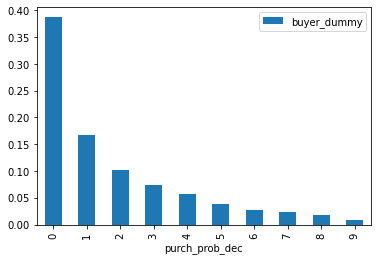

In [11]:
data[['buyer_dummy','purch_prob_dec']].groupby('purch_prob_dec').mean().plot(kind='bar')

In [12]:
decile_report = data.groupby("purch_prob_dec").agg(
    total_customers=("buyer_dummy", "count"),
    total_buyers=("buyer_dummy", "sum"),
    response_rate=("buyer_dummy", "mean")
)
print (decile_report)

                total_customers  total_buyers  response_rate
purch_prob_dec                                              
0                          5000          1935       0.387000
1                          5000           836       0.167200
2                          5000           511       0.102200
3                          5000           368       0.073600
4                          5000           284       0.056800
5                          5000           196       0.039200
6                          4998           139       0.027811
7                          5002           121       0.024190
8                          5000            90       0.018000
9                          5000            42       0.008400


In [13]:
summary_report = data.groupby("purch_prob_dec").agg(
    mean_total_spent=("total_", "mean"),
    mean_months_since_last_purchase=("last", "mean"),
    mean_child_books=("child", "mean"),
    mean_youth_books=("youth", "mean"),
    mean_cookbooks=("cook", "mean"),
    mean_do_it_books=("do_it", "mean"),
    mean_reference_books=("refernce", "mean"),
    mean_art_books=("art", "mean"),
    mean_geography_books=("geog", "mean")
)
print (summary_report)

                mean_total_spent  mean_months_since_last_purchase  \
purch_prob_dec                                                      
0                     257.352600                         7.194400   
1                     224.869200                         7.958000   
2                     214.228400                         8.618800   
3                     207.643000                         8.782800   
4                     199.111800                         9.573200   
5                     199.130200                        10.937600   
6                     191.297319                        12.372149   
7                     191.598161                        14.417833   
8                     193.610800                        17.857600   
9                     204.341600                        25.868400   

                mean_child_books  mean_youth_books  mean_cookbooks  \
purch_prob_dec                                                       
0                       1.06480

<b> Part III: Lifts and Gains </b> 

In [14]:
util.lift(data['buyer_dummy'],data['purch_prob'])

array([427.90800531, 306.39097744, 241.92835029, 201.79124281,
       173.99380805, 152.21878225, 134.87217909, 121.35117205,
       110.07911937, 100.        ])

In [15]:
util.gain(data['buyer_dummy'],data['purch_prob'])

array([0.        , 0.42790801, 0.61278195, 0.72578505, 0.80716497,
       0.86996904, 0.91331269, 0.9440513 , 0.97080938, 0.99071207,
       1.        ])

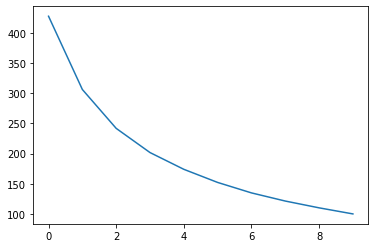

In [16]:
plt.plot(util.lift(data['buyer_dummy'],data['purch_prob']))

In [17]:
data['random_group'] = np.random.randint(1, 11, data.shape[0])

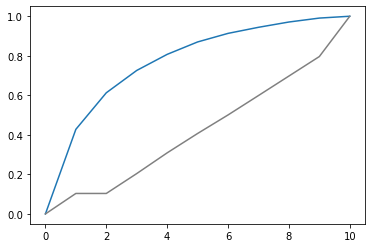

In [18]:
plt.plot(util.gain(data['buyer_dummy'],data['purch_prob']))
plt.plot(util.gain(data['buyer_dummy'],data['random_group']),color='grey')

<b> Part IV: Profitability Analysis </b> 

In [19]:
#break even response rate
unit_profit = 18-9-3
mail_price = 0.5

r_breakeven = mail_price/unit_profit
print(r_breakeven)

0.08333333333333333


In [20]:
data['target'] = (data['purch_prob'] >= r_breakeven) * 1

In [21]:
#expected number of customers
data_target = data[data['target']==1]
len(data_target)

15560

In [22]:
util.tabulate(data_target['buyer_dummy'])

,Name,Count,Frequency
0,0,12237,0.78644
1,1,3323,0.21356


In [23]:
#expected number of buyers
buyer_target = data[(data['target'] == 1) & (data['buyer_dummy'] == 1)]
len(buyer_target)

3323

In [24]:
target_report = data.groupby('target').agg(
    total_customers=('buyer_dummy', 'count'),
    expected_buyers=('buyer_dummy', 'sum'),
    expected_response_rate=('buyer_dummy', 'mean')
)
print (target_report)

        total_customers  expected_buyers  expected_response_rate
target                                                          
0                 34440             1199                0.034814
1                 15560             3323                0.213560


In [25]:
# calculate gross profit
remain_cus = 500000

mail_rate = len(data_target)/ remain_cus
res_rate = len(buyer_target)/ len(data_target)

profit = remain_cus * mail_rate * res_rate * unit_profit - remain_cus * mail_rate * mail_price
print ("The expected profit is $", round (profit,2))

The expected profit is $ 12158.0


In [26]:
# calculate gross profit as a percentage of gross sales
unit_rev = 18
margin = profit/(remain_cus * mail_rate * res_rate * unit_rev)
print ("The expected gross profit margin is", round(margin*100, 2),"%")

The expected gross profit margin is 20.33 %


In [27]:
# calculate expected return on marketing expenditures 
ROI = profit/(remain_cus * mail_rate * mail_price)
print ("The expected gross profit margin is", round(ROI * 100, 2),"%")

The expected gross profit margin is 156.27 %
